<a href="https://colab.research.google.com/github/DhayuIntan/Machine_Learning/blob/main/jobsheet_12/tugas_praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,843 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
IMG_DIR = '/content/drive/MyDrive/images/'

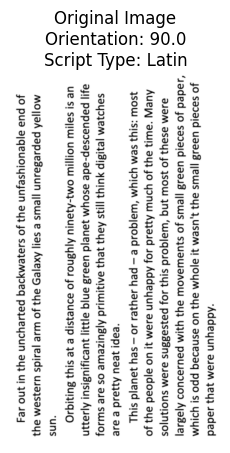

Original Image
Orientation: 90.0
Script Type: Latin
Detected Text: ‘Addeyun asam jeu} Jaded

jo sadaid uae8 |jeWS Jy} },USeM }! BJOYM Uy} UO asnedaq ppo Ss! YDIUM

‘1aded jo sadaid uaai3 |jelWs JO SJUBLUAAOW 94} YIM pausaoUOD Ajazie|

3JIM BSU} JO JSOW Ng ‘Wajqod siy} JO} pajsadsns a1aM suO!yNjOs

Aue ‘awi} ay} Jo YOnwW Ayasd 10} Addeyun asam 3 UO ajdoad ay} Jo
JSOW :SIy} SEM YDIYM ‘Wajqoid e — pey Jayjes JO — sey Jaueld siyy

“eap! yeau Ajjaud e aue

SAYIIEM [eUSIP YUIY} []19S Ady. JEU} SAIZILULId AjsulZeWe Os ase SWIOJ

a}1| Papusdsap-ade ssoUM JoueR|d UBeI3 an|g aj}qI] JUeDIJIUSISU! AjJa}4N
ue SI Saji UOI||IWW OMj-AjauIU A]YBNOJ JO adUejSIP e Je SIY} BUIZIGIO

‘uns

MO}||aA papsesaiun |jews e salj Axejed ay} JO Wie jesIds Ua}saM au}
JO pua ajqeuolysejun ay} JO SsajzeMyIeG PayeyouN au} ul yNo Je




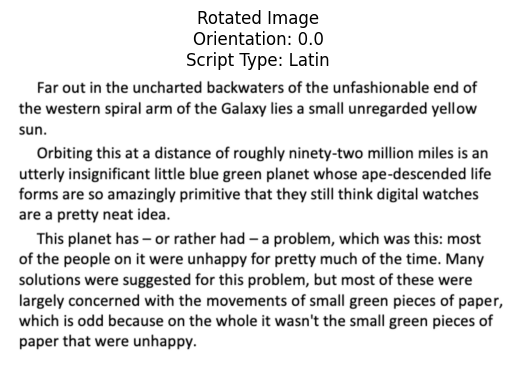

Rotated Image
Orientation: 0.0
Script Type: Latin
Detected Text: Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.




In [31]:
# Fungsi untuk mendapatkan orientasi teks dari gambar menggunakan Tesseract
def get_text_orientation(image):
    # Gunakan Tesseract untuk mendeteksi orientasi dan jenis skrip
    osd = pytesseract.image_to_osd(image)
    orientation_info = osd.split('\n')[2].split(': ')[1]
    return float(orientation_info)  # Konversi orientasi ke tipe float

# Fungsi untuk mendeteksi tipe skrip (Latin atau Non-Latin)
def detect_script_type(image):
    # Ubah gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Ambil tepi menggunakan Canny
    edges = cv2.Canny(gray, 50, 150)

    # Temukan kontur pada gambar
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Inisialisasi daftar untuk menyimpan hasil deteksi jenis skrip
    detected_script_types = []

    # Loop melalui setiap kontur
    for contour in contours:
        # Peroleh kotak pembatas dari kontur
        x, y, w, h = cv2.boundingRect(contour)

        # Deteksi jenis skrip berdasarkan properti ROI
        aspect_ratio = w / h if h != 0 else 0  # Hindari pembagian oleh 0
        if aspect_ratio > 0.5:
            detected_script_types.append("Latin")
        else:
            detected_script_types.append("Non-Latin")

    # Jika lebih dari setengah ROI terdeteksi sebagai jenis skrip Latin, maka hasilnya "Latin"
    if detected_script_types.count("Latin") > len(detected_script_types) / 2:
        return "Latin"
    else:
        return "Non-Latin"

# Fungsi untuk mendeteksi dan menampilkan karakter menggunakan Tesseract
def detect_and_show_text(image, title):
    # Gunakan Tesseract untuk mendeteksi teks
    text = pytesseract.image_to_string(image)

    # Tampilkan gambar
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

    # Cetak informasi
    print(f'{title}\nDetected Text: {text}')
    print()

# Baca gambar
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Dapatkan orientasi teks dan jenis skrip pada gambar asli
orientation_original, script_type_original = get_text_orientation(image), detect_script_type(image)

# Rotasi gambar sehingga orientasi teks menjadi 0
rotation_angle = get_text_orientation(image)
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE if rotation_angle > 0 else cv2.ROTATE_90_COUNTERCLOCKWISE)

# Dapatkan orientasi teks dan jenis skrip pada gambar yang sudah dirotasi
orientation_rotated, script_type_rotated = get_text_orientation(rotated_image), detect_script_type(rotated_image)

# Tampilkan hasil
detect_and_show_text(image, f'Original Image\nOrientation: {orientation_original}\nScript Type: {script_type_original}')
detect_and_show_text(rotated_image, f'Rotated Image\nOrientation: {orientation_rotated}\nScript Type: {script_type_rotated}')
